# House Median Value Pricing

## Content
This project has a dataset that contains the **median house prices** for California districts derived from the 1990 census.
Hence, using this dataset, I will try to predict the ***median house value*** for a particular house given the features of the house

In [48]:
# import necessary libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Reading Data

In [84]:
df = pd.read_csv('housing.csv')
display(df.head())
print()
display(df.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

From the above, I can see ***total_bedrooms*** has some null values and the column headers are formatted really nicely
Next, perform data cleaning and preparation: 
- convert all object datatypes to lower strings

### Data cleaning:  Null value removal and string conversion
fill all null values with 0 and convert ocean_proximity contents to lower strings

In [85]:
list(df.dtypes[df.dtypes == 'object'].index)

['ocean_proximity']

In [86]:
#convert all strings to lower case and remove spacing
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [87]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


### EDA : Finiding Insights

In [88]:
df.shape # data rows and columns number

(20640, 10)

In [89]:
# find all null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

we try to fill all null values with 0 to clear this step

In [90]:
df = df.fillna(0)

In [91]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [92]:
df.shape

(20640, 10)

In [93]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [94]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7]) # looks for all unique values
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28]
844

latitude
[37.88 37.86 37.85 37.84 37.83 37.82 37.81]
862

housing_median_age
[41. 21. 52. 42. 50. 40. 49.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.  919. 2535.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.  213.  489.]
1924

population
[ 322. 2401.  496.  558.  565.  413. 1094.]
3888

households
[ 126. 1138.  177.  219.  259.  193.  514.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200. 269700. 299200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

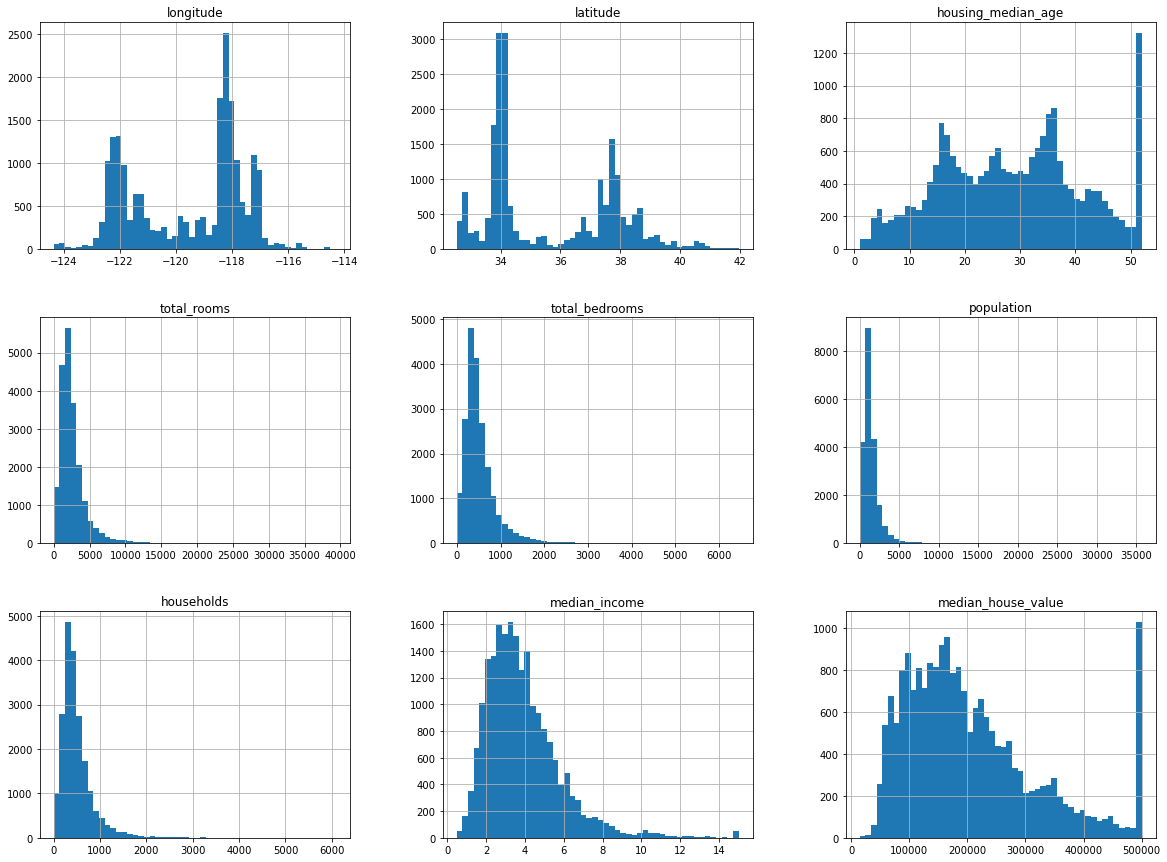

In [95]:
df.hist(bins=50, figsize=(20,15))

median income doesn't make sense because it looks likes the income variables have been scaled. Range: $(0-15)



**Now let's study the target variable**

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

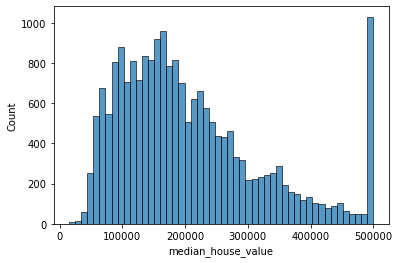

In [96]:
sns.histplot(df.median_house_value, bins=50)

There is some long tail distribution and this could cause some slight problems so we solve that.

In [97]:
median_house_val_logs =  np.log1p(df.median_house_value)

In [98]:
df['median_house_val_logs'] = median_house_val_logs

In [99]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_val_logs
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,12.743154


In [100]:
del df['median_house_value']

In [101]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_val_logs
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,13.022766


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

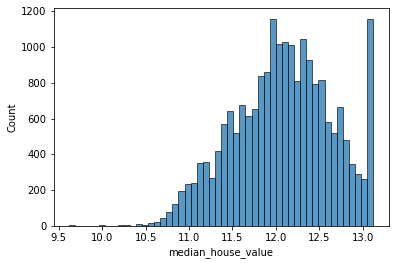

In [102]:
sns.histplot(median_house_val_logs, bins=50)

In [103]:
df.median_house_val_logs

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_val_logs, Length: 20640, dtype: float64

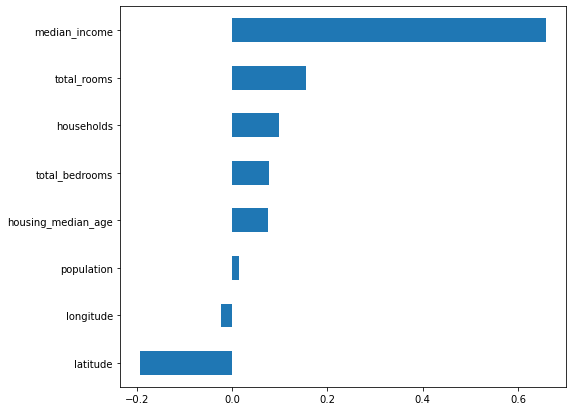

In [104]:
plt.figure(figsize = (8, 7))
df.corr()['median_house_val_logs'].sort_values().drop("median_house_val_logs").plot(kind = "barh");

from the above now we are seeing that all features but **population** and **longitude** are having little impact on the target variable(**median_house_val_logs**)

In [105]:
# split the categorical and numerical columns
categorical =list(df.select_dtypes('object').columns)
numerical = list(df.drop(['median_house_val_logs'], axis=1).select_dtypes('number').columns)

In [106]:
print('Numerical: ', numerical)
print('Categorical: ', categorical)

Numerical:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical:  ['ocean_proximity']


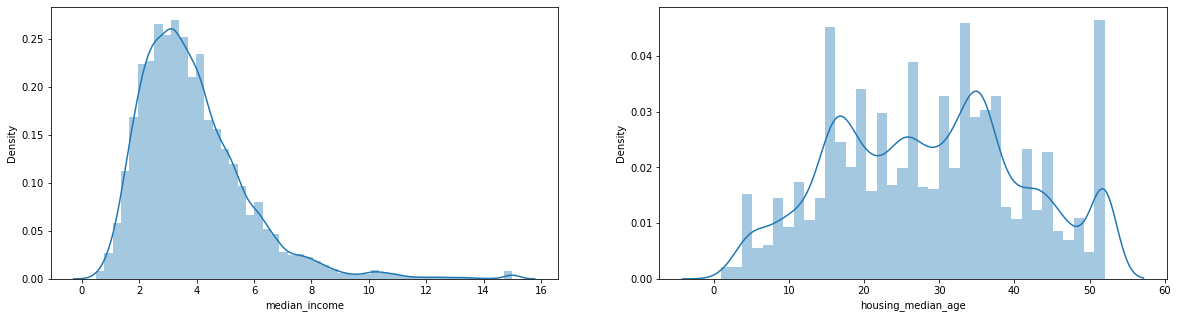

In [107]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['median_income'])

plt.subplot(122)
sns.distplot(df['housing_median_age'])
plt.show();    

let's look at the correlation of numeric data

In [108]:
df[numerical].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000


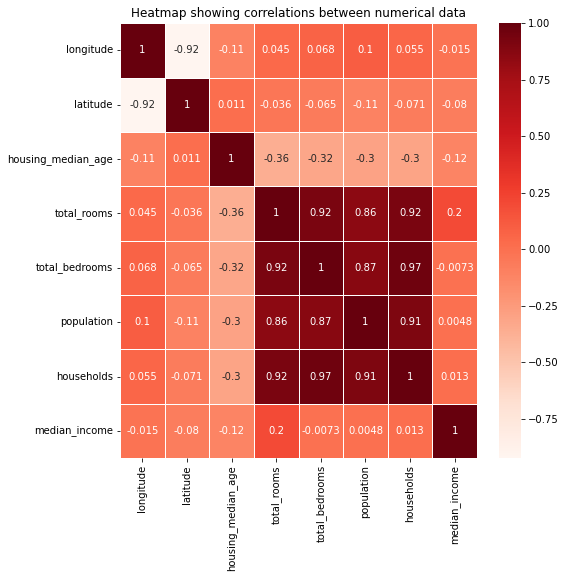

In [109]:
plt.figure(figsize=(8,8))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

Here we can see how closely related some features are; we might have to drop some later.

In [110]:
df[numerical[:5]].corr().unstack().sort_values(ascending = False)

longitude           longitude             1.000000
latitude            latitude              1.000000
total_rooms         total_rooms           1.000000
housing_median_age  housing_median_age    1.000000
total_bedrooms      total_bedrooms        1.000000
total_rooms         total_bedrooms        0.920196
total_bedrooms      total_rooms           0.920196
                    longitude             0.068082
longitude           total_bedrooms        0.068082
total_rooms         longitude             0.044568
longitude           total_rooms           0.044568
housing_median_age  latitude              0.011173
latitude            housing_median_age    0.011173
total_rooms         latitude             -0.036100
latitude            total_rooms          -0.036100
                    total_bedrooms       -0.065318
total_bedrooms      latitude             -0.065318
housing_median_age  longitude            -0.108197
longitude           housing_median_age   -0.108197
total_bedrooms      housing_med

from above now we can see that **total rooms** and **total bedrooms** are really closely related: might drop one

Now we look at the relation of the **numerical data** and the **target variables**

In [111]:
df[numerical].corrwith(df.median_house_val_logs).abs().sort_values(ascending = False)

median_income         0.658431
latitude              0.192596
total_rooms           0.154154
households            0.098728
total_bedrooms        0.077606
housing_median_age    0.076007
longitude             0.023209
population            0.014745
dtype: float64

With the output from above, we can say that **median_income** is a really important feature

We have one categorical feature so we have to see how it affects this target variable

In [112]:
# determine the feature importance for the categorical variables
# use the mutual_info_score to determine the relation of 
# one categorical variable to the target variable

def mutual_info_median_house_val_log_score(series):
    return mutual_info_score(series, df.median_house_val_logs)

In [113]:
df[categorical].head()

,ocean_proximity
0,near_bay
1,near_bay
2,near_bay
3,near_bay
4,near_bay


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [115]:
mutual_info = df[categorical].apply(mutual_info_median_house_val_log_score)
mutual_info.sort_values(ascending=False)

ocean_proximity    0.472584
dtype: float64

And we can see from output that ocean proximity or closeness of house to the see greatly affects the target variable

### Data Separation: Setting up the validation framework

I am gonna split it into three datasets (train, val, and test) - training, validation and test datasets I will use scikit-learn for this step

In [116]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=43)

In [117]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=43)

In [118]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [119]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [120]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_val_logs
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,near_bay,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,near_bay,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,near_bay,12.743154


In [121]:
y_train = df_train.median_house_val_logs.values
y_val = df_val.median_house_val_logs.values
y_test = df_test.median_house_val_logs.values

In [122]:
# drop target column
df_train = df_train.drop('median_house_val_logs', axis=1)
df_val = df_val.drop('median_house_val_logs', axis=1)
df_test = df_test.drop('median_house_val_logs', axis=1)

In [123]:
# peek at the training dataset
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.87,37.77,9.0,4838.0,920.0,2460.0,923.0,3.5959,inland
1,-122.62,37.97,52.0,370.0,62.0,150.0,56.0,7.7006,near_ocean
2,-117.56,33.86,25.0,6964.0,1066.0,3240.0,1036.0,5.2898,inland
3,-118.58,34.21,24.0,2642.0,696.0,1649.0,633.0,3.0187,<1h_ocean
4,-117.65,34.13,24.0,2121.0,296.0,913.0,302.0,5.9328,inland


In [124]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.15,34.19,48.0,1854.0,360.0,1126.0,382.0,3.2216,<1h_ocean
1,-120.08,36.72,22.0,1339.0,251.0,820.0,276.0,3.6000,inland
2,-122.31,37.54,45.0,1222.0,220.0,492.0,205.0,5.5390,near_ocean
3,-121.96,37.33,26.0,3269.0,788.0,1427.0,696.0,4.2136,<1h_ocean
4,-122.13,37.68,45.0,2457.0,445.0,1129.0,422.0,4.0588,near_bay


In [125]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.19,33.99,36.0,1273.0,379.0,1398.0,353.0,2.4516,<1h_ocean
1,-118.28,34.09,49.0,3828.0,1197.0,2862.0,1009.0,2.4677,<1h_ocean
2,-121.07,38.66,22.0,1831.0,274.0,813.0,269.0,4.6394,inland
3,-117.98,33.75,37.0,1264.0,274.0,783.0,273.0,3.3438,<1h_ocean
4,-121.79,36.68,22.0,6912.0,1513.0,3794.0,1455.0,3.0608,<1h_ocean


In [128]:
y_train

array([11.86850681, 12.66571339, 12.08447547, ..., 12.16055736,
       11.4804126 , 12.40123227])

### MORE EDA

In [129]:
numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [134]:
#Correlation of median_house_value (target) with all cols:
df.corr()['median_house_val_logs'].abs().sort_values(ascending = False)

median_house_val_logs    1.000000
median_income            0.658431
latitude                 0.192596
total_rooms              0.154154
households               0.098728
total_bedrooms           0.077606
housing_median_age       0.076007
longitude                0.023209
population               0.014745
Name: median_house_val_logs, dtype: float64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

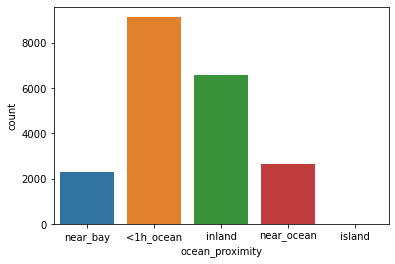

In [135]:
sns.countplot(x=df['ocean_proximity'])

<AxesSubplot:ylabel='ocean_proximity'>

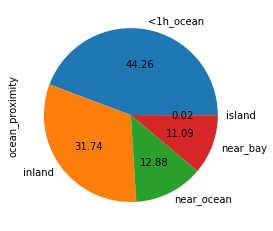

In [136]:
df['ocean_proximity'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:xlabel='median_income', ylabel='median_house_val_logs'>

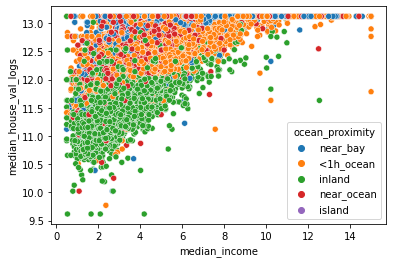

In [138]:
sns.scatterplot(x=df['median_income'],y=df['median_house_val_logs'],hue=df['ocean_proximity'])

**Note:** *Median Income* is in \\$10000 in this scenario.
What this suggest is : people with an average income of range \\$10000 to \\$60000 per year tend to live more inland as the houses are cheaper than people, looking at the extreme end, earning very high income/yr. These high earning people tend to buy higher houses and live around one hundered miles close to the ocean. This tend can be seen more active around people earning \\$40000 to \\$100000

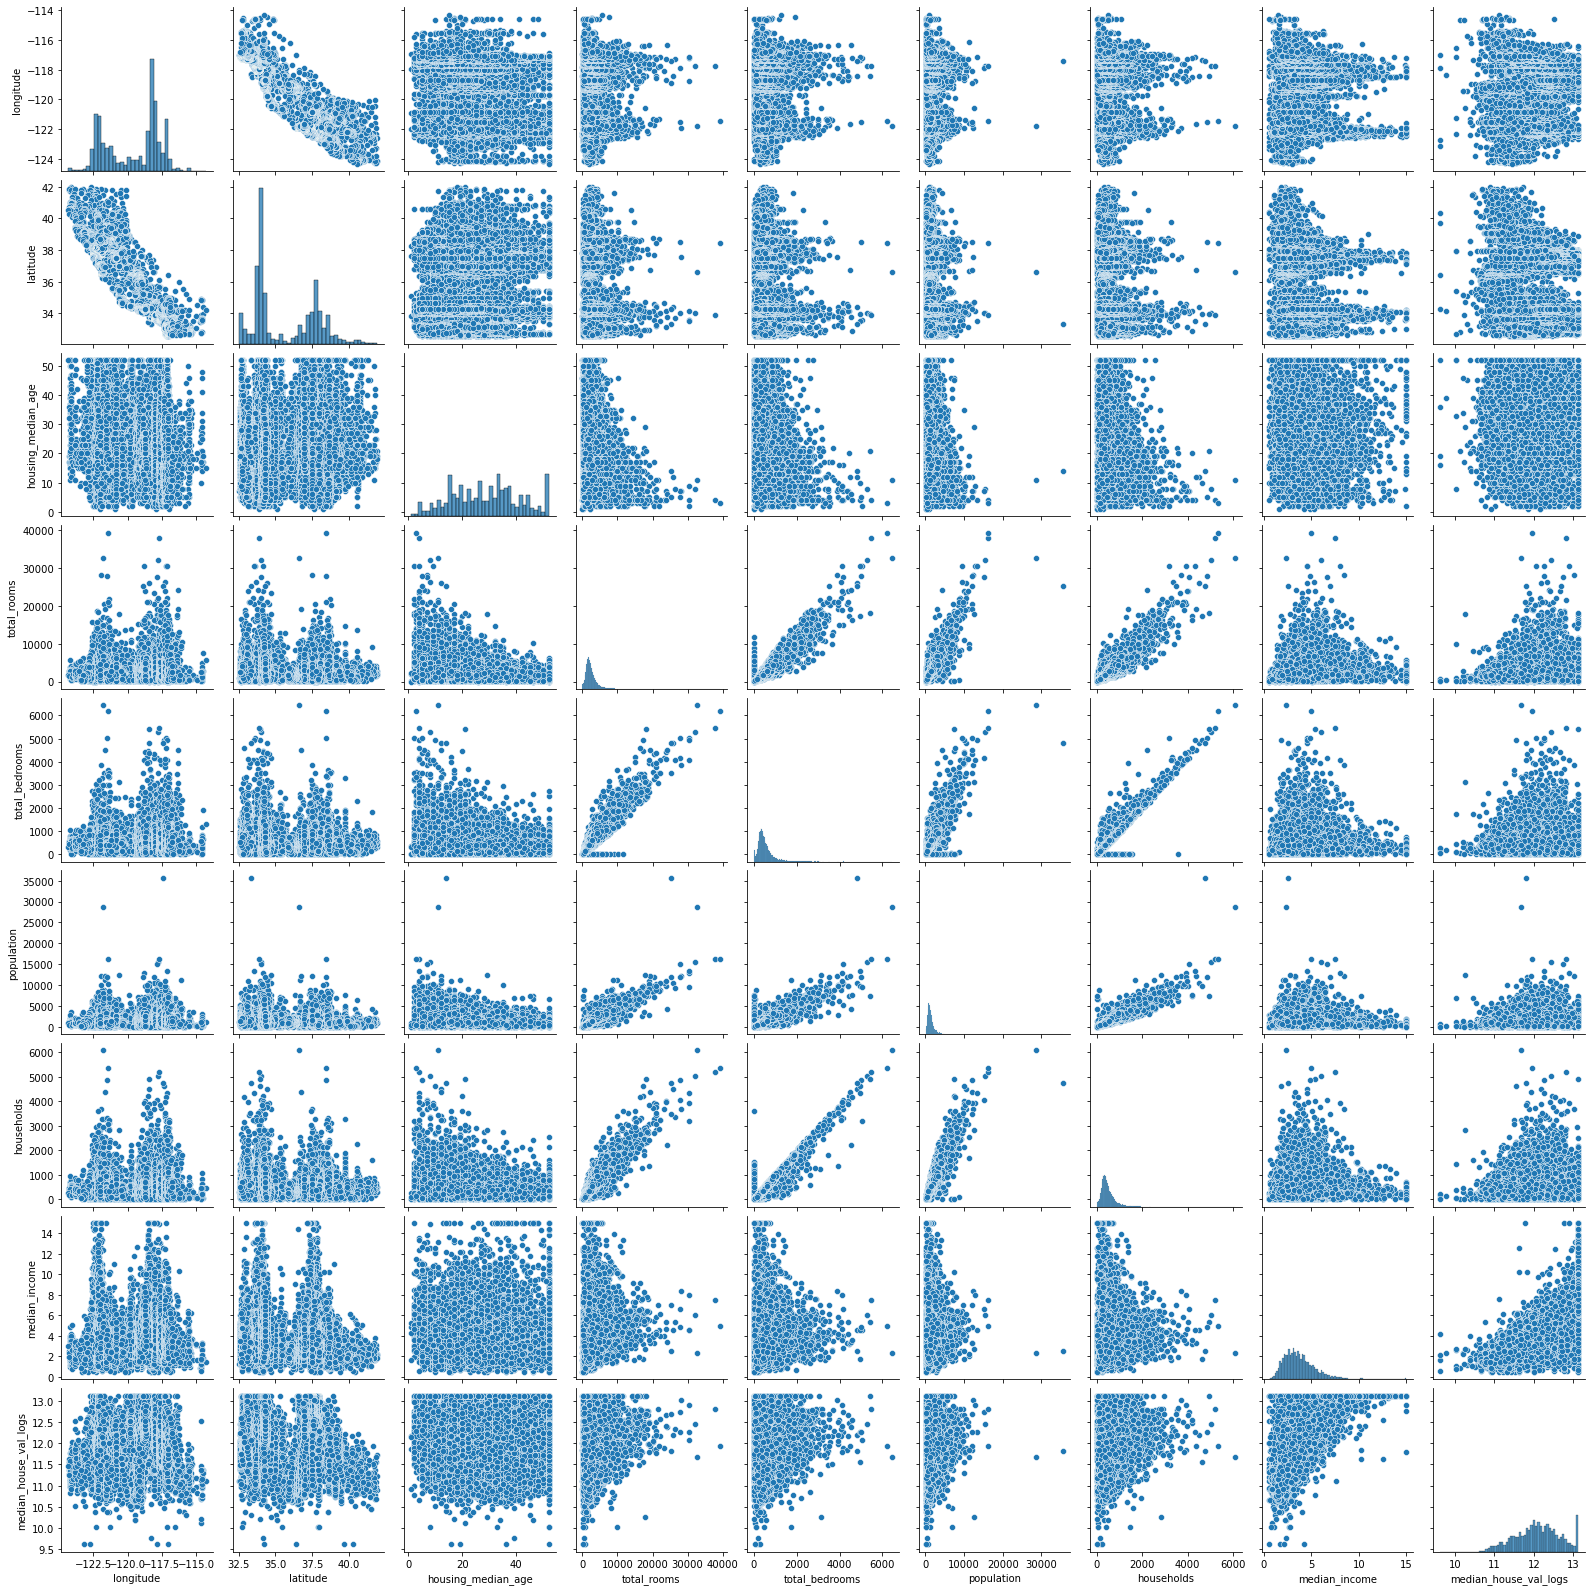

In [139]:
sns.pairplot(df)

In [141]:
# perfrom linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

let's create a baseline model with the two most important features

In [188]:
base = ['median_income', 'ocean_proximity']

In [189]:
df[base].sample(5)

,median_income,ocean_proximity
9513,3.0000,<1h_ocean
8553,3.9375,near_ocean
2433,1.9676,inland
17574,2.3633,<1h_ocean
16229,3.5703,inland


In [190]:
# prepare the X_train & X_val
train_dict = df_train[base].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train

array([[3.5959, 0.    , 1.    , 0.    , 0.    , 0.    ],
       [7.7006, 0.    , 0.    , 0.    , 0.    , 1.    ],
       [5.2898, 0.    , 1.    , 0.    , 0.    , 0.    ],
       ...,
       [3.9963, 1.    , 0.    , 0.    , 0.    , 0.    ],
       [3.1014, 0.    , 1.    , 0.    , 0.    , 0.    ],
       [3.2279, 0.    , 0.    , 0.    , 0.    , 1.    ]])

In [191]:
val_dict = df_val[base].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [192]:
y_train

array([11.86850681, 12.66571339, 12.08447547, ..., 12.16055736,
       11.4804126 , 12.40123227])

In [193]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
model.intercept_ # bias term

11.672614756661996

In [194]:
w = model.coef_ # weights
w.round(3)

array([ 0.168, -0.083, -0.603,  0.756, -0.035, -0.036])

In [195]:
dict(zip(dv.get_feature_names_out(),w.round(3)))

{'median_income': 0.168,
 'ocean_proximity=<1h_ocean': -0.083,
 'ocean_proximity=inland': -0.603,
 'ocean_proximity=island': 0.756,
 'ocean_proximity=near_bay': -0.035,
 'ocean_proximity=near_ocean': -0.036}

In [196]:
y_pred = model.predict(X_val)

In [197]:
score = np.sqrt(mean_squared_error(y_val, y_pred))

In [198]:
score

0.3563033137386963

It has a good rmse just using **two** features. So we use this as a benchmark

Now, let's try adding a regularization parameter to the model

In [199]:
for a in [0, 0.01, 0.1, 1, 10, 10000]:
    model = Ridge(alpha=a,random_state=43)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.356
0.01 0.356
0.1 0.356
1 0.356
10 0.356
10000 0.401


As we can see, using the regularization parameter does not really affect performance so we stick with non-reguralized model

Now let's add all the features and evaluate

In [224]:
features =  numerical + categorical
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [225]:
train_dict = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train

array([[9.2300e+02, 9.0000e+00, 3.7770e+01, ..., 2.4600e+03, 9.2000e+02,
        4.8380e+03],
       [5.6000e+01, 5.2000e+01, 3.7970e+01, ..., 1.5000e+02, 6.2000e+01,
        3.7000e+02],
       [1.0360e+03, 2.5000e+01, 3.3860e+01, ..., 3.2400e+03, 1.0660e+03,
        6.9640e+03],
       ...,
       [3.2520e+03, 4.0000e+00, 3.3490e+01, ..., 8.8240e+03, 4.0550e+03,
        2.1988e+04],
       [3.8400e+02, 3.7000e+01, 3.8520e+01, ..., 9.5500e+02, 4.1300e+02,
        1.9020e+03],
       [8.3100e+02, 3.4000e+01, 3.4440e+01, ..., 2.3610e+03, 8.7800e+02,
        4.3140e+03]])

In [226]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1h_ocean',
       'ocean_proximity=inland', 'ocean_proximity=island',
       'ocean_proximity=near_bay', 'ocean_proximity=near_ocean',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [227]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [228]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [229]:
model.intercept_ 

-2.13649869058065

In [230]:
w = model.coef_ # weights
w.round(3)

array([ 0.   ,  0.002, -0.16 , -0.162,  0.165, -0.05 , -0.369,  0.588,
       -0.092, -0.077, -0.   ,  0.   ,  0.   ])

In [231]:
dict(zip(dv.get_feature_names_out(),w.round(3)))

{'households': 0.0,
 'housing_median_age': 0.002,
 'latitude': -0.16,
 'longitude': -0.162,
 'median_income': 0.165,
 'ocean_proximity=<1h_ocean': -0.05,
 'ocean_proximity=inland': -0.369,
 'ocean_proximity=island': 0.588,
 'ocean_proximity=near_bay': -0.092,
 'ocean_proximity=near_ocean': -0.077,
 'population': -0.0,
 'total_bedrooms': 0.0,
 'total_rooms': 0.0}

In [232]:
X_val

array([[ 382.  ,   48.  ,   34.19, ..., 1126.  ,  360.  , 1854.  ],
       [ 276.  ,   22.  ,   36.72, ...,  820.  ,  251.  , 1339.  ],
       [ 205.  ,   45.  ,   37.54, ...,  492.  ,  220.  , 1222.  ],
       ...,
       [ 734.  ,   13.  ,   38.69, ..., 2093.  ,  821.  , 4492.  ],
       [1235.  ,   21.  ,   37.34, ..., 6047.  , 1232.  , 6404.  ],
       [ 245.  ,   25.  ,   36.8 , ..., 1050.  ,  255.  , 1270.  ]])

In [233]:
y_pred = model.predict(X_val)

In [234]:
score = np.sqrt(mean_squared_error(y_val, y_pred))

In [235]:
score

0.3293878877381525

exprimented as saw that removing the features that were really correlated **total_bedrooms** and **total_rooms** only made the model a bit worse so I will use all features

The above is done using a simple Linear Regression model. Now I want to try DecisionTreeRegressor, RandomForestRegressor and XGBoost models to build new models and see if I can achieve a lower rmse score

**Decision Tree**

In [237]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [239]:
DecisionTreeRegressor?